In [114]:
import pandas as pd
import geopandas as gpd
import rasterio
import rasterio.features
import rasterio.warp
from rasterio.plot import show
#Importing the Nominatim geocoder class 
#from geopy.geocoders import Nominatim
from shapely.geometry import point, Polygon
import rioxarray
from pyproj import CRS
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import requests

%matplotlib inline

## Download zip files from the following websites:

https://www.geopunt.be/download?container=dhm-vlaanderen-ii-dsm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DSM,%20raster,%201m
and 
https://www.geopunt.be/download?container=dhm-vlaanderen-ii-dtm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DTM,%20raster,%201m

In [3]:
from bs4 import BeautifulSoup
from urllib2 import *

sourcePage = urlopen(Request('https://www.geopunt.be/download?container=dhm-vlaanderen-ii-dsm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DSM,%20raster,%201m')) soup = BeautifulSoup(sourcePage.read())

SyntaxError: invalid syntax (Temp/ipykernel_6392/3595785940.py, line 4)

# Open geotiff files
## DTM - Digital Terrain Model file

In [8]:
terrain = rioxarray.open_rasterio("C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif", masked = True)
terrain

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
[153000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  33.270000457764
    STATISTICS_MEAN:     12.715703254367
    STATISTICS_MINIMUM:  3.1400001049042
    STATISTICS_STDDEV:   3.1190120842843
    scale_factor:        1.0
    add_offset:          0.0

In [9]:
print(terrain.rio.crs) # Coordinate Reference System
print(terrain.rio.nodata)
print(terrain.rio.bounds())
print(terrain.rio.width)
print(terrain.rio.height)

EPSG:31370
nan
(145000.0, 238000.0, 162000.0, 247000.0)
17000
9000


In [10]:
terrain.values

array([[[  nan,   nan,   nan, ..., 12.75, 12.79, 12.8 ],
        [  nan,   nan,   nan, ..., 12.8 , 12.81, 12.84],
        [  nan,   nan,   nan, ..., 12.84, 12.83, 12.88],
        ...,
        [ 4.52,  4.55,  4.57, ..., 16.8 , 16.93, 16.9 ],
        [ 4.49,  4.57,  4.58, ..., 16.91, 16.91, 16.93],
        [ 4.48,  4.55,  4.57, ..., 16.86, 16.88, 16.9 ]]], dtype=float32)

In [11]:
type(terrain)

xarray.core.dataarray.DataArray

In [12]:
print(terrain.rio.crs) # database of CRS information, each has a specific number

EPSG:31370


In [13]:
print(terrain.rio.crs.to_epsg())

31370


In [14]:
epsg = terrain.rio.crs.to_epsg()
crs = CRS(epsg)
crs

# Axis Info: the CRS shows a Cartesian system with two axis, an easting and northing, in meter units.
# Area of Use: the projection is used for a particular range of longitudes 
# Coordinate Operation: the operation to project the coordinates (if it is projected) on to a cartesian (x, y) plane.
# Datum: Details about the datum, or the reference point for coordinates.

<Projected CRS: EPSG:31370>
Name: BD72 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore.
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [15]:
crs.area_of_use

AreaOfUse(west=2.5, south=49.5, east=6.4, north=51.51, name='Belgium - onshore.')

In [16]:
crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [17]:
terrain.rio.crs.linear_units

'metre'

In [18]:
print(terrain.min())
print(terrain.max())
print(terrain.mean())
print(terrain.std())

<xarray.DataArray ()>
array(3.14, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(33.27, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(12.715716, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(3.1190107, dtype=float32)
Coordinates:
    spatial_ref  int32 0


In [19]:
print(terrain.quantile([0.25, 0.75]))

<xarray.DataArray (quantile: 2)>
array([10.44999981, 14.98999977])
Coordinates:
  * quantile  (quantile) float64 0.25 0.75


In [20]:
terrain.shape

(1, 9000, 17000)

In [21]:
terrain_ra = rasterio.open('C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif')
terrain_ra

<open DatasetReader name='C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif' mode='r'>

In [22]:
terrain_ra.count

1

In [71]:
terrain_ra.shape

(9000, 17000)

In [23]:
terrain_ra.width

17000

In [24]:
terrain_ra.height

9000

In [25]:
terrain_ra.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [109]:
terrain_ra.crs.wkt

'PROJCS["BD72 / Belgian Lambert 72",GEOGCS["BD72",DATUM["Reseau_National_Belge_1972",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],AUTHORITY["EPSG","6313"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4313"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",90],PARAMETER["central_meridian",4.36748666666667],PARAMETER["standard_parallel_1",51.1666672333333],PARAMETER["standard_parallel_2",49.8333339],PARAMETER["false_easting",150000.013],PARAMETER["false_northing",5400088.438],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","31370"]]'

In [94]:
terrain_ra_array = terrain_ra.read(1)
terrain_ra_array

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,  1.279e+01,
         1.280e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,  1.281e+01,
         1.284e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,  1.283e+01,
         1.288e+01],
       ...,
       [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,  1.693e+01,
         1.690e+01],
       [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,  1.691e+01,
         1.693e+01],
       [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.686e+01,  1.688e+01,
         1.690e+01]], dtype=float32)

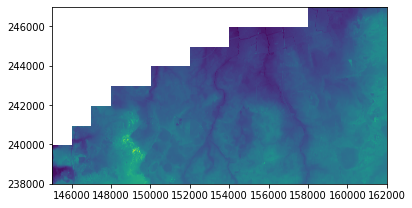

<AxesSubplot:>

In [95]:
show(terrain_ra)

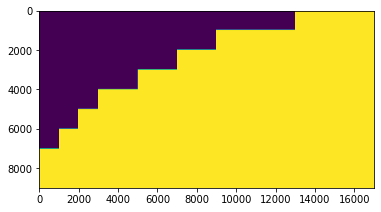

<AxesSubplot:>

In [103]:
show(terrain_ra.read(1))

In [104]:
terrain_slice = terrain_ra_array[8000:8010, 10010:10020]
terrain_slice

array([[14.2 , 14.15, 14.16, 14.26, 14.26, 14.29, 14.36, 14.6 , 14.59,
        14.47],
       [14.12, 14.17, 14.17, 14.16, 14.24, 14.26, 14.33, 14.4 , 14.46,
        14.47],
       [14.12, 14.07, 14.11, 14.16, 14.19, 14.22, 14.24, 14.29, 14.38,
        14.39],
       [14.12, 14.1 , 14.14, 14.13, 14.15, 14.19, 14.21, 14.27, 14.27,
        14.34],
       [14.11, 14.1 , 14.12, 14.11, 14.18, 14.14, 14.18, 14.17, 14.18,
        14.23],
       [14.06, 14.09, 14.11, 14.09, 14.09, 14.17, 14.13, 14.17, 14.24,
        14.13],
       [14.05, 14.08, 14.02, 14.09, 14.03, 14.06, 14.06, 14.09, 14.13,
        14.08],
       [14.01, 14.09, 14.09, 14.03, 14.02, 14.04, 14.02, 14.05, 14.07,
        14.03],
       [13.98, 14.  , 13.99, 13.99, 14.  , 14.  , 14.04, 14.03, 14.05,
        14.04],
       [13.96, 13.96, 13.99, 13.96, 13.99, 14.  , 13.99, 14.01, 14.05,
        14.1 ]], dtype=float32)

In [105]:
# data for plotting
nx = terrain_slice.shape[1]
ny = terrain_slice.shape[0]
x = range(nx)
y = range(ny)

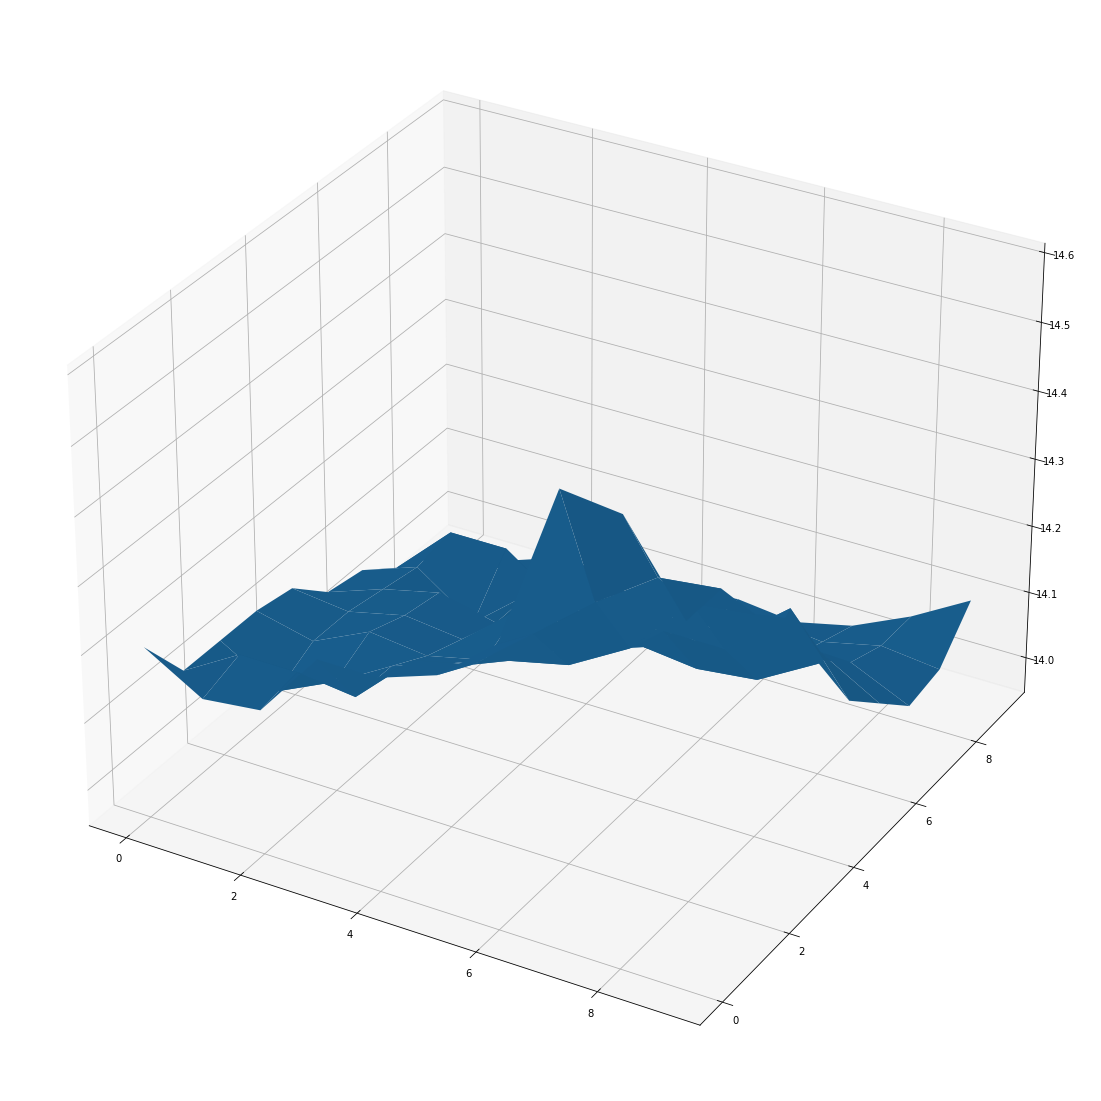

In [106]:
# initialize figure and axes3D objects
hf = plt.figure(figsize = (20,20))
ha = hf.add_subplot(111, projection='3d')

# plotting the 3D data
X, Y = np.meshgrid(x,y)
ha.plot_surface(X, Y, terrain_slice)
plt.show()

## DSM - Digital Surface Model file

In [30]:
surface = rioxarray.open_rasterio("C:/Users/kasia/pyproj/3D_houses/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif", masked = True)
surface

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
[153000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  98.559997558594
    STATISTICS_MEAN:     15.598165931673
    STATISTICS_MINIMUM:  -3.25
    STATISTICS_STDDEV:   7.0595914207194
    scale_factor:        1.0
    add_offset:          0.0

In [31]:
surface.shape

(1, 9000, 17000)

In [32]:
surface_ra = rasterio.open('C:/Users/kasia/pyproj/3D_houses/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif')

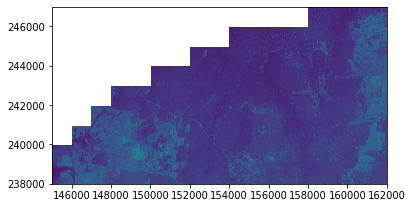

<AxesSubplot:>

In [33]:
show(surface_ra)

In [185]:
surface_ra_array = surface_ra.read(1)
surface_ra_array

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,  1.279e+01,
         1.280e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,  1.281e+01,
         1.284e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,  1.283e+01,
         1.288e+01],
       ...,
       [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,  1.693e+01,
         1.690e+01],
       [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,  1.691e+01,
         1.695e+01],
       [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,  1.688e+01,
         1.691e+01]], dtype=float32)

In [186]:
surface_slice = surface_ra_array[8000:8010, 10010:10020]
surface_slice

array([[23.69, 20.11, 22.15, 23.19, 18.87, 24.7 , 24.21, 16.91, 25.06,
        17.06],
       [22.35, 20.47, 19.84, 20.77, 24.53, 20.82, 18.87, 19.31, 17.33,
        21.85],
       [14.12, 16.97, 19.3 , 22.47, 22.84, 23.53, 23.81, 20.4 , 21.54,
        18.48],
       [16.56, 16.28, 19.28, 22.09, 16.3 , 21.55, 24.34, 23.64, 19.29,
        23.24],
       [14.07, 18.7 , 19.08, 21.41, 22.45, 23.45, 19.07, 24.24, 23.7 ,
        22.85],
       [14.08, 17.66, 15.66, 19.96, 22.27, 24.16, 22.69, 16.61, 15.53,
        19.72],
       [14.05, 14.07, 20.63, 22.84, 21.94, 19.82, 24.63, 25.21, 22.46,
        25.71],
       [14.8 , 14.15, 21.45, 26.47, 25.7 , 19.22, 25.6 , 20.08, 19.22,
        19.16],
       [20.97, 19.85, 22.72, 25.54, 27.87, 25.74, 24.29, 29.13, 29.14,
        26.37],
       [20.34, 24.76, 21.63, 28.31, 26.04, 31.  , 29.44, 30.79, 29.73,
        25.56]], dtype=float32)

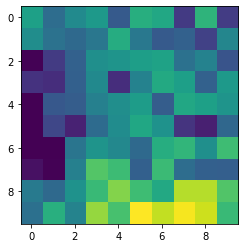

<AxesSubplot:>

In [238]:
show(surface_slice)

In [187]:
# data for plotting
nx = surface_slice.shape[1]
ny = surface_slice.shape[0]
x = range(nx)
y = range(ny)

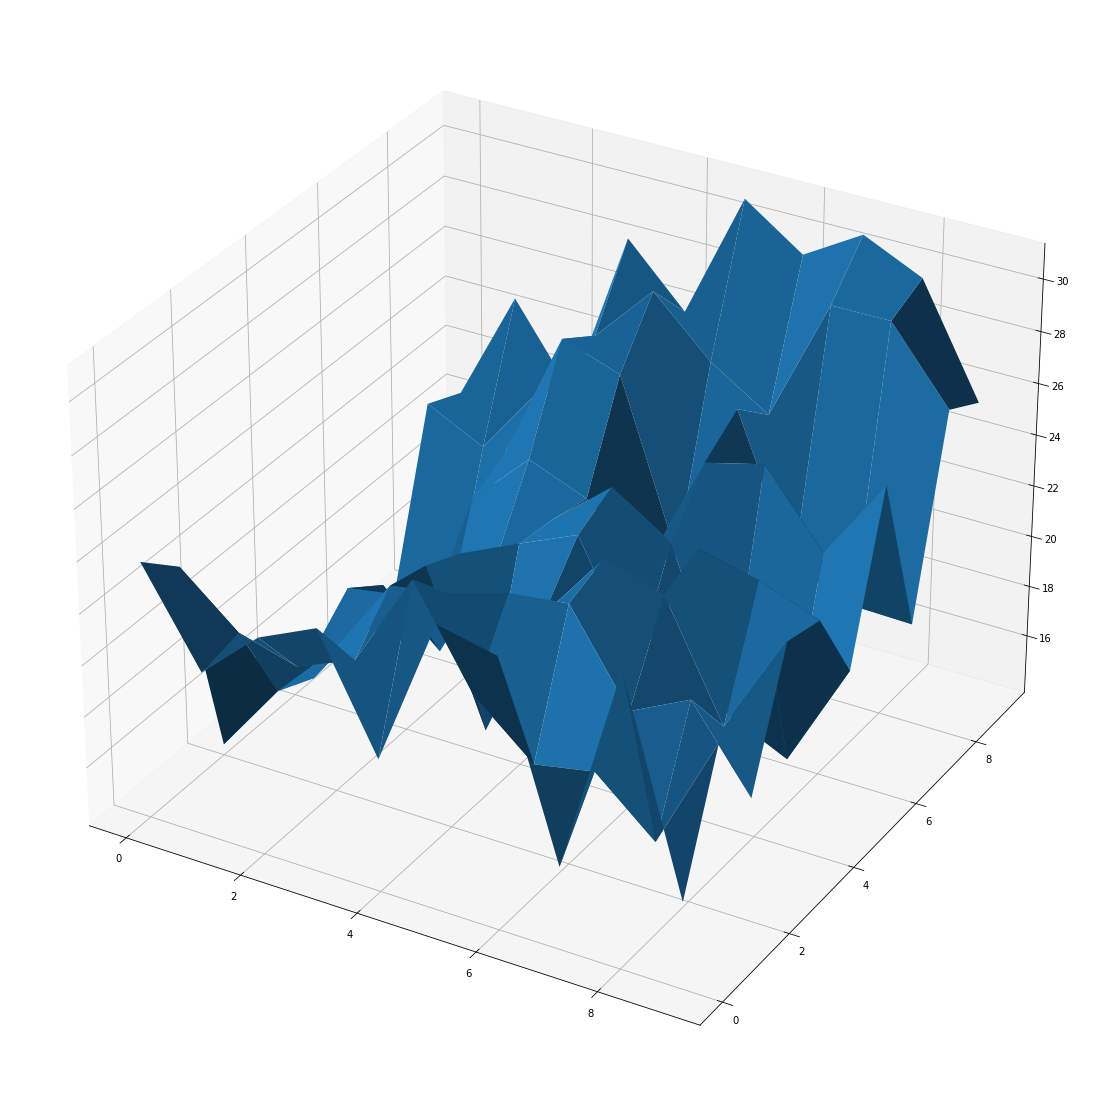

In [188]:
# initialize figure and axes3D objects
hf = plt.figure(figsize = (20,20))
ha = hf.add_subplot(111, projection='3d')

# plotting the 3D data
X, Y = np.meshgrid(x,y)
ha.plot_surface(X, Y, surface_slice)
plt.show()

In [34]:
terrain_matched = terrain.rio.reproject_match(surface)

In [35]:
canopy = surface - terrain_matched
canopy.compute()

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
array([[[       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.02000046],
        [0.        , 0.        , 0.        , ..., 0.01000023,
         0.        , 0.01000023]]], dtype=float32)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0

In [36]:
print(canopy.min())
print(canopy.max())
print(canopy.mean())
print(canopy.std())

<xarray.DataArray ()>
array(-13.79, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(91.4532, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(2.8824549, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(5.4895062, dtype=float32)
Coordinates:
    spatial_ref  int32 0


Calculating CHM with rasterio

In [239]:
dtm = terrain_ra.read(1)

In [240]:
dsm = surface_ra.read(1)

In [241]:
chm = dsm - dtm # calculating canopy height model

In [242]:
chm

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02000046],
       [0.        , 0.        , 0.        , ..., 0.01000023, 0.        ,
        0.01000023]], dtype=float32)

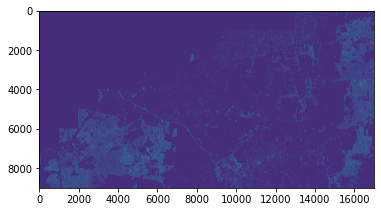

<AxesSubplot:>

In [266]:
show(chm)

In [267]:
chm_slice = chm[6000:6100, 6000:6100]
chm_slice

array([[ 6.170001 ,  6.8499994,  5.790001 , ..., 11.000001 , 11.780001 ,
        10.570001 ],
       [11.660001 ,  5.0299997, 14.049999 , ..., 10.5199995, 12.120001 ,
         8.339999 ],
       [17.36     , 15.66     , 13.599999 , ...,  6.9900007,  5.6799994,
        11.06     ],
       ...,
       [18.100002 , 16.7      , 18.439999 , ..., 17.999998 , 17.61     ,
        18.02     ],
       [18.329998 , 18.26     ,  2.5299997, ..., 18.       , 13.7300005,
        17.830002 ],
       [17.529999 , 18.11     , 18.33     , ..., 17.07     , 17.43     ,
        17.42     ]], dtype=float32)

In [268]:
# data for plotting
nx = chm_slice.shape[1]
ny = chm_slice.shape[0]
x = range(nx)
y = range(ny)

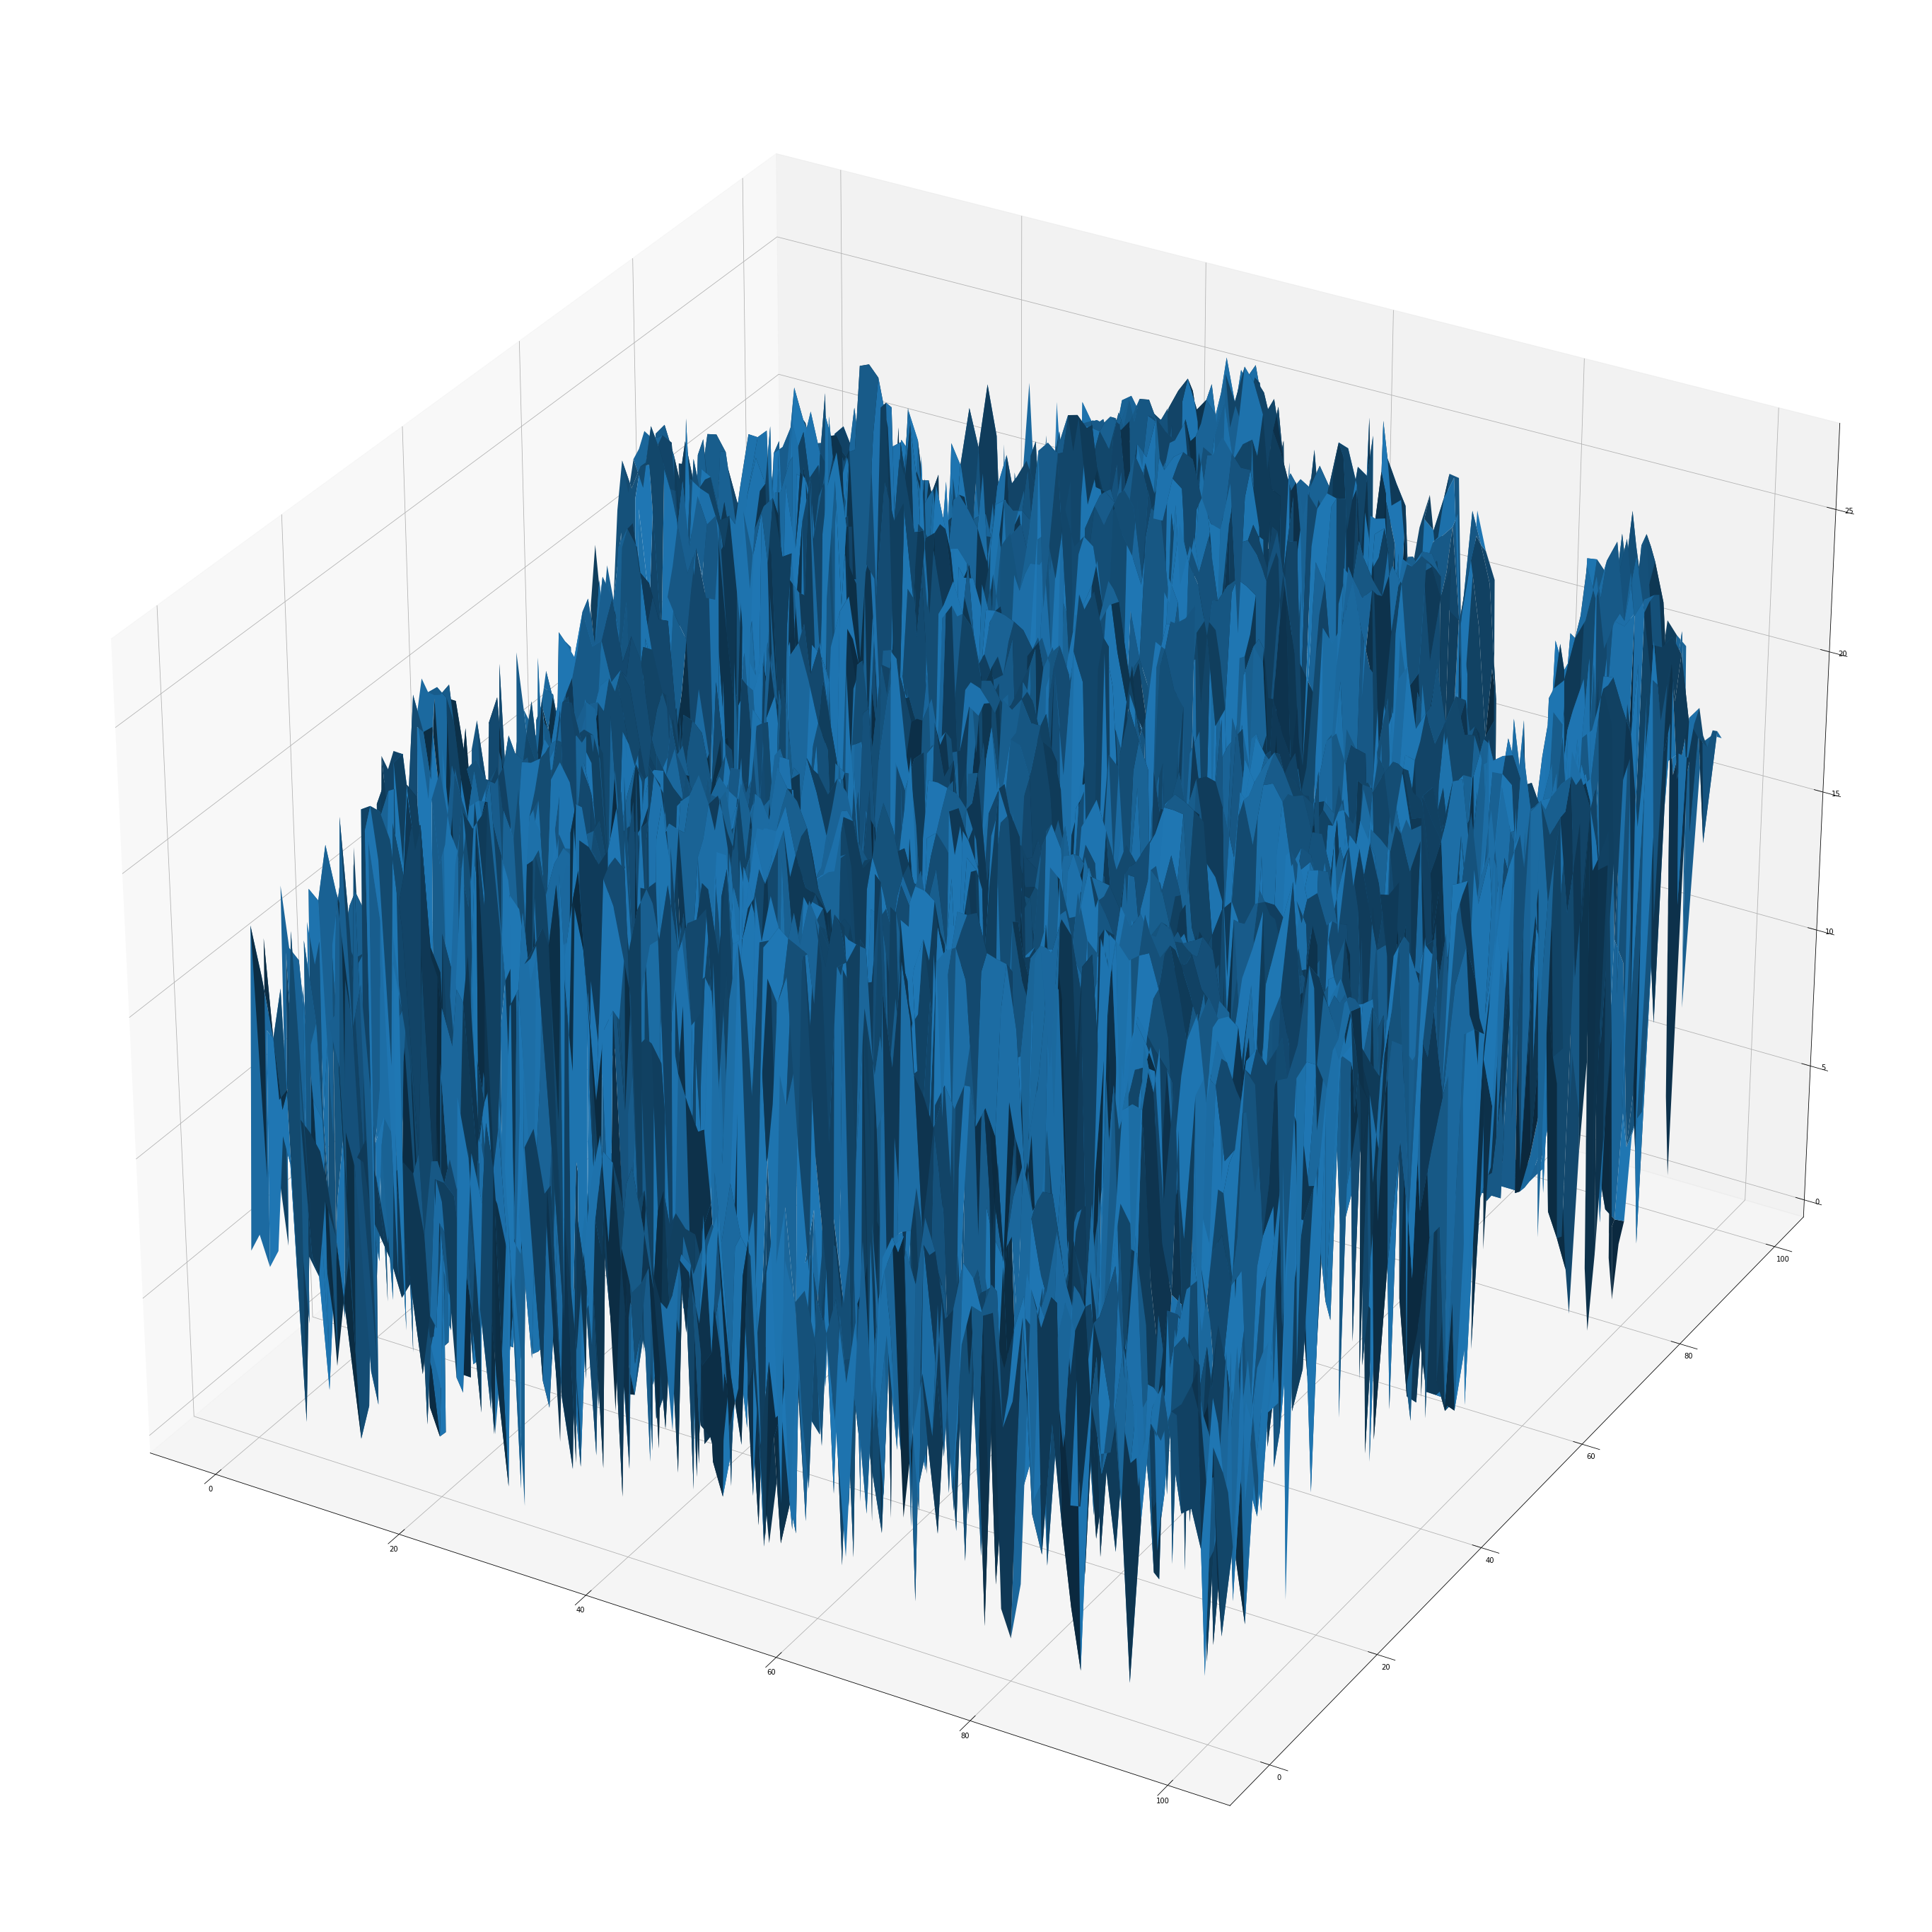

In [269]:
# initialize figure and axes3D objects
hf = plt.figure(figsize = (50,50))
ha = hf.add_subplot(111, projection='3d')

# plotting the 3D data
X, Y = np.meshgrid(x,y)
ha.plot_surface(X, Y, chm_slice)
plt.show()

## Open .shp file

In [37]:
path = 'C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp'

In [38]:
test = gpd.read_file(path)

In [39]:
test

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


<AxesSubplot:>

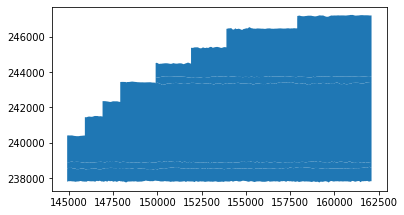

In [40]:
test.plot()

## Geocode the provided address:

In [41]:
address = 'Sint-Pietersvliet 7, Antwerpen'

In [42]:
location = gpd.tools.geocode(address)

In [43]:
location

,geometry,address
0,POINT (4.40106 51.22535),"Radio 2 Antwerpen, 7, Sint-Pietersvliet, 2000,..."


## Re-Projecting: Transforming the representation of locations (coordinates) from one coordinate system (EPSG) to another *https://geopandas.readthedocs.io/en/latest/docs/user_guide/projections.html

In [44]:
.to_crs("EPSG:4326")

SyntaxError: invalid syntax (Temp/ipykernel_26660/1035018759.py, line 1)

In [ ]:
terrain_4326 = terrain.rio.reproject("EPSG:4326") #https://corteva.github.io/rioxarray/stable/examples/reproject.html
terrain_4326

## Geocode the provided address via https://loc.geopunt.be/ API 

In [206]:
street = 'Pastoor Soeteweystraat'
number = '70'
postcode = '2640'
city = 'Mortsel'

In [207]:
url = f'https://loc.geopunt.be/v4/Location?q={street}%20{number},%20{postcode}%20{city}'
data = response = requests.get(url).json()

In [208]:
data

{'LocationResult': [{'Municipality': 'Mortsel',
   'Zipcode': '2640',
   'Thoroughfarename': 'Pastoor Soeteweystraat',
   'Housenumber': '70',
   'ID': 1016381,
   'FormattedAddress': 'Pastoor Soeteweystraat 70, 2640 Mortsel',
   'Location': {'Lat_WGS84': 51.17194250916875,
    'Lon_WGS84': 4.477131653631457,
    'X_Lambert72': 157579.56,
    'Y_Lambert72': 206887.21},
   'LocationType': 'crab_huisnummer_manueleAanduidingVanGebouw',
   'BoundingBox': {'LowerLeft': {'Lat_WGS84': 51.17194250916875,
     'Lon_WGS84': 4.477131653631457,
     'X_Lambert72': 157579.56,
     'Y_Lambert72': 206887.21},
    'UpperRight': {'Lat_WGS84': 51.17194250916875,
     'Lon_WGS84': 4.477131653631457,
     'X_Lambert72': 157579.56,
     'Y_Lambert72': 206887.21}}}]}

In [209]:
coordinates = data["LocationResult"][0]["Location"]

In [210]:
X_Lambert72 = coordinates["X_Lambert72"]
Y_Lambert72 = coordinates["Y_Lambert72"]

In [211]:
print(X_Lambert72)
print(Y_Lambert72)

157579.56
206887.21


In [212]:
url_pol = 'https://api.basisregisters.vlaanderen.be/v1/adresmatch'

In [215]:
data_pol = response = requests.get(url_pol).json()

In [216]:
data_pol

{'validationErrors': {'': ["Gelieve minstens één van de volgende velden op te geven: 'Gemeentenaam', 'Niscode', 'Postcode'.",
   "Gelieve minstens één van de volgende velden op te geven: 'KadStraatcode', 'RrStraatcode', 'Straatnaam'."]},
 'type': 'urn:be.vlaanderen.basisregisters.api:validation',
 'title': 'Er heeft zich een fout voorgedaan!',
 'detail': 'Validatie mislukt!',
 'status': 400,
 'instance': 'https://api.basisregisters.vlaanderen.be/v1/foutmeldingen/3e60fd18475d536eb1599fffd0c94c2d'}

In [205]:
building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
build = requests.get(building['gebouw']['detail']).json()
info['polygon'] = [build['geometriePolygoon']['polygon']]

NameError: name 'building' is not defined

In [270]:
address = input('Provide a valid address in Flanders: ')

Provide a valid address in Flanders: Heikantstraat 60, 2910 Essen


In [271]:
def get_coordinates(address: str):
    req = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
    info = {'address' : address, 
                'x_value' : req['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : req['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : req['LocationResult'][0]['Thoroughfarename'],
                'house_number' : req['LocationResult'][0]['Housenumber'], 
                'postcode': req['LocationResult'][0]['Zipcode'], 
                'municipality' : req['LocationResult'][0]['Municipality']}
    
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    info['polygon'] = [build['geometriePolygoon']['polygon']]
    return info['polygon'][0]['coordinates'][0] 

In [224]:
polygoon = get_coordinates(address)
polygoon

[[152234.7539967969, 212884.87605375424],
 [152234.82894080132, 212884.9189977534],
 [152234.7067647949, 212885.13282175362],
 [152234.54202879965, 212885.42107775435],
 [152221.9368447885, 212878.215253748],
 [152216.66906878352, 212875.20392574742],
 [152215.47796478122, 212874.52302974463],
 [152215.7520127818, 212874.04302974418],
 [152215.85204478353, 212874.10197374597],
 [152216.04097278416, 212873.7709657438],
 [152225.4219647944, 212857.33397373557],
 [152225.34394878894, 212857.28994173557],
 [152231.24206079543, 212846.96808572486],
 [152231.36404479295, 212847.0380377248],
 [152246.52404480428, 212820.42696570978],
 [152246.43796480447, 212820.37493370846],
 [152246.70881280303, 212819.90990970656],
 [152246.73498880863, 212819.8649817072],
 [152246.9969408065, 212820.01717370749],
 [152247.5319168046, 212820.3279577084],
 [152249.9582208097, 212816.06210170686],
 [152251.11796481162, 212814.0229977034],
 [152251.02298881114, 212814.00994170457],
 [152251.31399680674, 21281